# Tensorflow  Framework for Multi-class Text Classification

## Sentiment Classification - 3 Class Problem

* Financial Phrasebank Dataset <br/>

    * 0 - Positive <br/>
    * 1 - Negative <br/>
    * 2 - Neutral  <br/>

## Reading Data

In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.append("..")
pd.set_option('display.max_colwidth', -1)

In [2]:
df_train = pd.read_csv('../datasets/financial_phrasebank/training.csv', sep='\t')
df_test = pd.read_csv('../datasets/financial_phrasebank/testing.csv', sep='\t')
df_val = pd.read_csv('../datasets/financial_phrasebank/validation.csv', sep='\t')

df_train.shape, df_test.shape, df_val.shape

((3100, 3), (970, 3), (776, 3))

In [3]:
df_train.label.value_counts()

neutral     1821
positive    892 
negative    387 
Name: label, dtype: int64

In [4]:
df_val.label.value_counts()

neutral     475
positive    208
negative    93 
Name: label, dtype: int64

## Processing Data in Input format

In [5]:
data_classes = ['positive', 'negative', 'neutral']

df_train['label'] = df_train['label'].apply(data_classes.index)
df_test['label'] = df_test['label'].apply(data_classes.index)
df_val['label'] = df_val['label'].apply(data_classes.index)

In [6]:
df_test.head()

,Unnamed: 0,text,label
0,178,"comparable operating profit totaled EUR 854mn , up from EUR 730mn in 2004 .",0
1,4157,Finnish M-real 's Kyro mill is starting negotiations to cut staff .,1
2,3616,"In 2007 , the Group 's net sales stood at EUR 42 million and it had about 1,445 employees .",2
3,194,"Finnish lifting equipment maker Konecranes Oyj said on July 30 , 2008 that its net profit rose to 71.2 mln euro ( $ 111.1 mln ) for the first half of 2008 from 57.1 mln euro ( $ 89.1 mln ) for the same period of 2007 .",0
4,1584,"Pulkovo park will be ready in 2016 , its first stage of 23,000 sq. m. will be finished in the first quarter of 2010 .",2


In [7]:
df_bert_train = pd.DataFrame({'id':df_train['Unnamed: 0'],
            'text':df_train['text'],
            'label':df_train['label']})

df_bert_test = pd.DataFrame({'id':df_test['Unnamed: 0'],
            'text':df_test['text']})

df_bert_val = pd.DataFrame({'id':df_val['Unnamed: 0'],
            'text':df_val['text'],
            'label':df_val['label']})

In [8]:
df_bert_train.to_csv('../datasets/financial_phrasebank/train.csv',index=False)
df_bert_test.to_csv('../datasets/financial_phrasebank/test.csv',index=False)
df_bert_val.to_csv('../datasets/financial_phrasebank/dev.csv',index=False)

## Training (Bert | Electra) classifier with FrameWork

In [9]:
# from classitransformers.tfelectra import ElectraClassification

from classitransformers.report import metrics
from classitransformers.configs import Configs

from classitransformers.tfbert import BertClassification

## Set Configurations

* Pre-trained config filepath, vocab filepath and model checkpoint filepath
* labels list
* train, test and eval batch size
* max_seq_len - how long is the each text input sentence !!
* data_dir - data path folder (optional)
* output_dir - output path folder (optional)

In [10]:
# config = Configs(pretrained_model_dir = '../models/Electra_base/', 
#                  model_name = 'electra'
#                  num_train_epochs = 3,
#                  train_batch_size = 24, 
#                  eval_batch_size = 8, 
#                  predict_batch_size = 8, 
#                  do_train = True, 
#                  do_eval = True, 
#                  label_list = ["0", "1", "2"], 
#                  max_seq_length = 64,
#                  data_dir='../datasets/financial_phrasebank/',
#                  output_dir = '../electra_output_sentiment/')

# model = ElectraClassification(config)


config = Configs(pretrained_model_dir = '../models/Bert_base/',
                 model_name = 'bert',
                 num_train_epochs = 3,
                 train_batch_size = 24, 
                 eval_batch_size = 8, 
                 predict_batch_size = 8, 
                 do_train = True, 
                 do_eval = True, 
                 label_list = ["0", "1", "2"], 
                 max_seq_length = 64,
                 data_dir='../datasets/financial_phrasebank/',
                 output_dir = '../bert_output_sentiment/')

model = BertClassification(config)

## Train Method

In [11]:
model.train()



INFO:tensorflow:Writing example 0 of 3100
INFO:tensorflow:***** Running training *****
INFO:tensorflow:  Num examples = 3100
INFO:tensorflow:  Batch size = 24
INFO:tensorflow:  Num steps = 387

INFO:tensorflow:Skipping training since max_steps has already saved.
INFO:tensorflow:training_loop marked as finished
INFO:tensorflow:Writing example 0 of 776
INFO:tensorflow:***** Running evaluation *****
INFO:tensorflow:  Num examples = 776 (776 actual, 0 padding)
INFO:tensorflow:  Batch size = 8
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.data.experimental.map_and_batch(...)`.
Instructions for updating:
Use `tf.data.Dataset.map(map_func, num_parallel_calls)` followed by `tf.data.Dataset.batch(batch_size, drop_remainder)`. Static tf.data optimizations will take care of using the fused implementation.

Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Running eval on CPU
I

INFO:tensorflow:  name = bert/encoder/layer_1/output/dense/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_1/output/LayerNorm/beta:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_1/output/LayerNorm/gamma:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_2/attention/self/query/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_2/attention/self/query/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_2/attention/self/key/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_2/attention/self/key/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_2/attention/self/value/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_2/attention/self/value/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert

INFO:tensorflow:  name = bert/encoder/layer_6/attention/output/LayerNorm/beta:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_6/attention/output/LayerNorm/gamma:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_6/intermediate/dense/kernel:0, shape = (768, 3072), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_6/intermediate/dense/bias:0, shape = (3072,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_6/output/dense/kernel:0, shape = (3072, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_6/output/dense/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_6/output/LayerNorm/beta:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_6/output/LayerNorm/gamma:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_7/attention/self/query/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  nam

INFO:tensorflow:  name = bert/encoder/layer_11/attention/self/key/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_11/attention/self/value/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_11/attention/self/value/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_11/attention/output/dense/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_11/attention/output/dense/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_11/attention/output/LayerNorm/beta:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_11/attention/output/LayerNorm/gamma:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_11/intermediate/dense/kernel:0, shape = (768, 3072), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_11/intermediate/dense/bias:0, shape = (3072,), *INIT

## Test Method

In [12]:
prediction = model.test()

INFO:tensorflow:Writing example 0 of 970
INFO:tensorflow:***** Running prediction*****
INFO:tensorflow:  Num examples = 970 (970 actual, 0 padding)
INFO:tensorflow:  Batch size = 8
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Running infer on CPU
INFO:tensorflow:*** Features ***
INFO:tensorflow:  name = input_ids, shape = (?, 64)
INFO:tensorflow:  name = input_mask, shape = (?, 64)
INFO:tensorflow:  name = is_real_example, shape = (?,)
INFO:tensorflow:  name = label_ids, shape = (?,)
INFO:tensorflow:  name = segment_ids, shape = (?, 64)
INFO:tensorflow:**** Trainable Variables ****
INFO:tensorflow:  name = bert/embeddings/word_embeddings:0, shape = (30522, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/embeddings/token_type_embeddings:0, shape = (2, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/embeddings/position_embeddings:0, shape = (512, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/embeddings/LayerNorm/beta:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorfl

INFO:tensorflow:  name = bert/encoder/layer_4/attention/self/query/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_4/attention/self/key/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_4/attention/self/key/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_4/attention/self/value/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_4/attention/self/value/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_4/attention/output/dense/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_4/attention/output/dense/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_4/attention/output/LayerNorm/beta:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_4/attention/output/LayerNorm/gamma:0, shape = (768,), *INIT_FROM_CKP

INFO:tensorflow:  name = bert/encoder/layer_8/output/dense/kernel:0, shape = (3072, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_8/output/dense/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_8/output/LayerNorm/beta:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_8/output/LayerNorm/gamma:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_9/attention/self/query/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_9/attention/self/query/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_9/attention/self/key/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_9/attention/self/key/bias:0, shape = (768,), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/encoder/layer_9/attention/self/value/kernel:0, shape = (768, 768), *INIT_FROM_CKPT*
INFO:tensorflow:  name = bert/

## Export the checkpoint model to pb (protobuf) format

**In TensorFlow, the protbuf file contains the graph definition as well as the weights of the model. Thus, a pb file is all you need to be able to run a given trained model.**

In [13]:
# Currently does not have support for Electra

model.export_model()

INFO:tensorflow:Using config: {'_model_dir': '../bert_output_sentiment/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2666b0a668>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
Instruction

'./exported_bert_model/1594469887'

## Inferencing from Trained Pb Model

* This tensorflow format is used for deployment purpose.

In [14]:
# Currently does not have support for Electra

predictions = model.inference(test_filename = '../datasets/financial_phrasebank/test.csv', batch_size = 256)


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from ./exported_bert_model/1594469887/variables/variables
Processing batch no.  0
Processing batch no.  1
Processing batch no.  2
Processing batch no.  3


**Testing a sentence, takes a list of sentences.**

In [15]:
# Only be used after .pb model has been exported for BERT

model.text_inference(['Trading gives the best returns among all the options of investemnts'])

INFO:tensorflow:Restoring parameters from ./exported_bert_model/1594469887/variables/variables


array([[0.97397816, 0.04661671, 0.2891322 ]], dtype=float32)

In [16]:
y_pred = [np.argmax(tup) for tup in prediction]
y = df_test.label

## Accuracy and Report



Accuracy: 0.862
Precision: 0.833
Recall: 0.848
F1-Score: 0.840


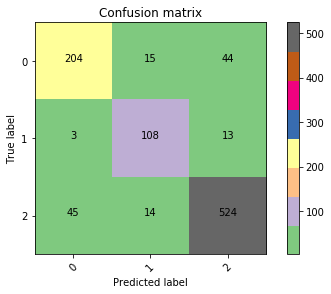

In [17]:
metrics(y, y_pred)